# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3x^{2}\ln(x) +x^{3}/x = 3x^{2}\ln(x) +x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
def dy(x):
    """
    возвращает значение производной функции  𝑦(𝑥)  в точке  𝑥 
    """
    if x <=0: raise ValueError("x должно быть больше 0, тк log(x)")
        
    return 3 * (x ** 2) * np.log(x) + (x ** 2)

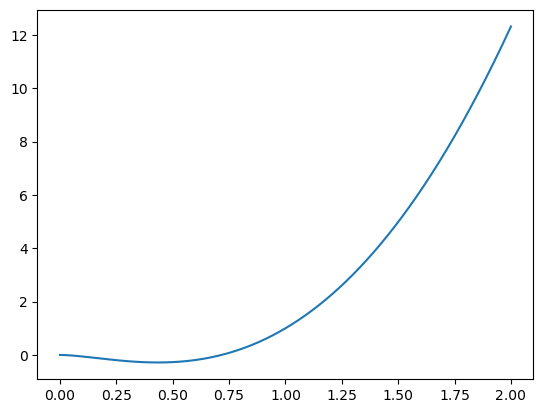

In [ ]:
arr = np.arange(0.0001,2,0.0001)
dy_arr = [dy(n) for n in arr]
plt.plot(arr,dy_arr)

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(x0, n_steps=3000, lr=0.01, threshold=0.0001, func=dy):
    """
    Поизводит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.
    args:
        - x0         - начальная точка
        - n_steps   - число шагов
        - lr        - learning rate (шаг обучения)
        - threshold - критерий остановки (если изменение весов меньше чем это значение)     
    """
    
    history = [x0]
    x = x0

    for iter_number in range(n_steps):
        # Вычисляем градиент в текущей точке
        grad = func(x)

        # Итерация градиентного спуска
        x = x - lr * grad / np.linalg.norm(grad)

        # Сохраняем новые аргументы в историяю
        history.append(x)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.abs(x - history[-2]) < threshold:
            break

    return np.array(history) 

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10
history = {}

history_1 = get_min_with_gd(1)
history_2 = get_min_with_gd(2)
history_10 = get_min_with_gd(10)

print(len(history_1), len(history_2), len(history_10))
print(min(history_1), min(history_2), min(history_10))

3001 3001 3001
0.7099999999999997 0.7099999999999989 0.7100000000001694


4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

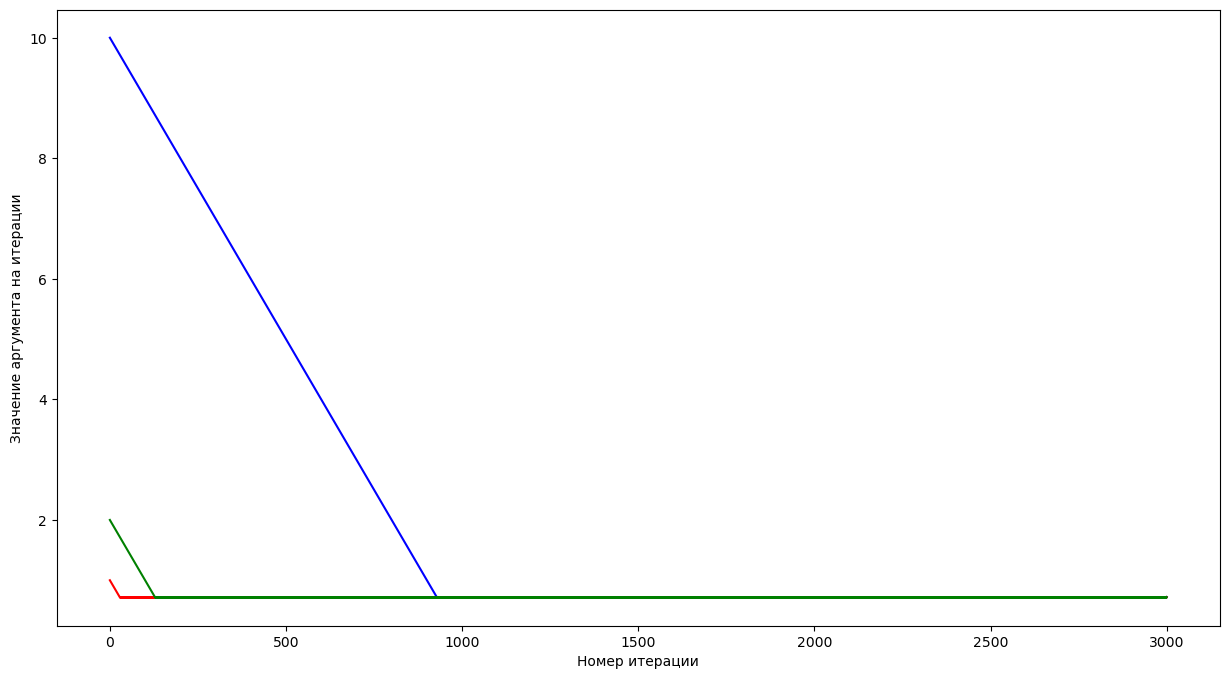

In [ ]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history_10, color='blue')
plt.plot(history_1, color='red')
plt.plot(history_2, color='green')


plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
def get_min_with_rmsprop(x0, n_steps=1000, lr=0.01, beta=0.001, threshold=0.0001, func=dy):
    """
    Поизводит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.
    args:
        - x0        - начальная точка
        - n_steps   - число шагов
        - lr        - learning rate (шаг обучения)
        - beta      - мера учета инерции
        - threshold - критерий остановки (если изменение весов меньше чем это значение)     
    """
    e = 0.001
    
    history = [x0]
    x = x0
    y = 0

    
    for iter_number in range(n_steps):
        # Вычисляем градиент в текущей точке
        grad = func(x)

        # Считаем вспомогательную функцию y
        y = beta * y + (1 - beta) * (grad ** 2)

        # Итерация градиентного спуска
        x = x - lr * grad / ((y + e) ** 0.5)

        # Сохраняем новые аргументы в историяю
        history.append(x)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.mean(np.abs(x - history[-2])) < threshold:
            break

    return np.array(history)

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2
history_rmsprop_0 = get_min_with_rmsprop(0)

ValueError: x должно быть больше 0, тк log(x)

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(1)
history_rmsprop_2 = get_min_with_rmsprop(2)
history_rmsprop_10 = get_min_with_rmsprop(10)

print(len(history_rmsprop_1), len(history_rmsprop_2), len(history_rmsprop_10))
print(min(history_rmsprop_1), min(history_rmsprop_2), min(history_rmsprop_10))

34 134 934
0.7165747734177761 0.716575217479391 0.7165754347747749


6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

C:\Users\USER\AppData\Local\Temp\ipykernel_26668\3114414616.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


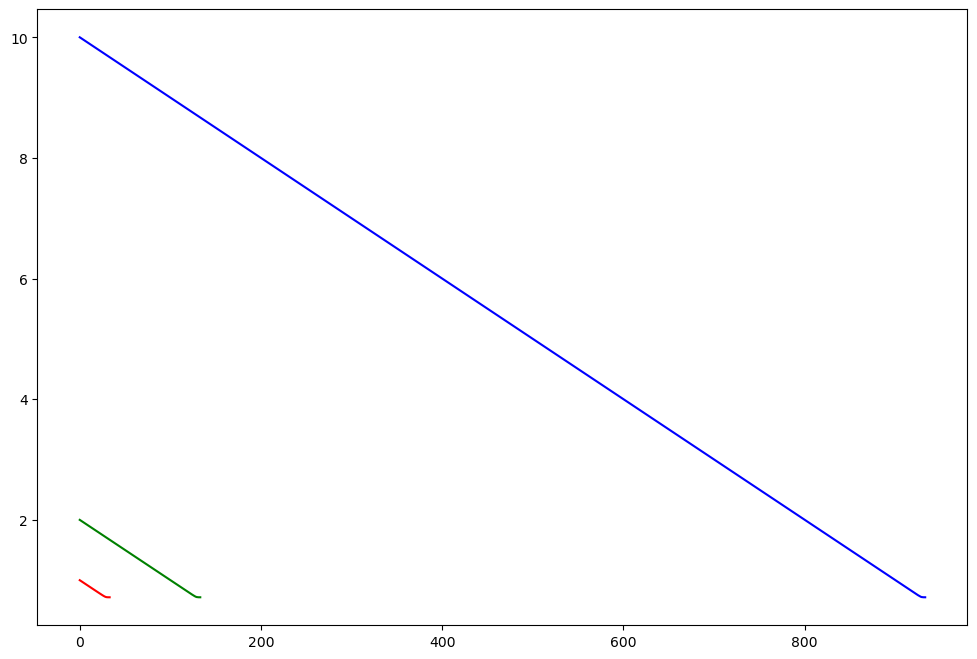

In [ ]:
# Ваш код тут
fig = plt.figure(figsize=(12,8))

plt.plot(history_rmsprop_1, color='red')
plt.plot(history_rmsprop_2, color='green')
plt.plot(history_rmsprop_10, color='blue')

fig.show()